# 1) Model Declarations

In [ ]:
# import modules
import pandas as pd
import numpy as np

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

# 2) Load Data and Initial Inspections

## 2.1) Load Data and Quality Checks

In [ ]:
train = pd.read_csv(r'C:\Personal\Learning\Projects\House Price Predictions - Kaggle\all\train.csv')
test = pd.read_csv(r'C:\Personal\Learning\Projects\House Price Predictions - Kaggle\all\test.csv')

In [ ]:
# Settings to see all columns of a pandas dataframe
pd.set_option('display.max_columns',999)

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Check the shape of datasets
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


   ## 2.2) Initial Data Inspection

__Inspecting what variables we are dealing with and whether they contain missing data, and what their distribution looks like__

In [ ]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

**We have missing data. Let's visualize missing data for both train and test set**

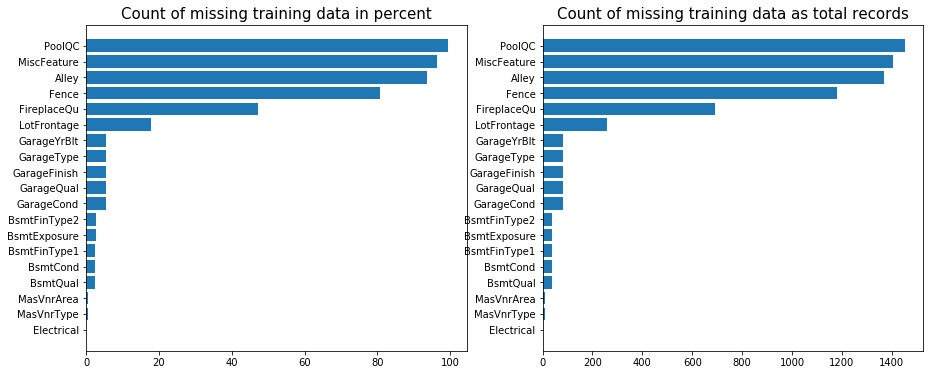

In [ ]:
# 1) Train set
# Capture the necessary data

variables = train.columns

count = []

for variable in variables:
    length = train[variable].count()
    count.append(length)

count_pc = np.round(100 * pd.Series(count)/ len(train),2)
count = pd.Series(count)

missing = pd.DataFrame()
missing['variables'] = variables
missing['count'] = len(train) - count
missing['count_pc'] = 100 - count_pc
missing = missing[missing['count_pc'] > 0 ]
missing.sort_values(by = ['count_pc'], inplace=True)
missing_train = np.array(missing['variables'])


# Plot number of available data per variable
plt.subplots(figsize=(15,6))


# Plot missing data in percentage
plt.subplot(1,2,1)
plt.barh(missing['variables'],missing['count_pc'])
plt.title('Count of missing training data in percent', fontsize = 15)


# Plot total row number of missing data
plt.subplot(1,2,2)
plt.barh(missing['variables'],missing['count'])
plt.title('Count of missing training data as total records', fontsize = 15)

plt.show()

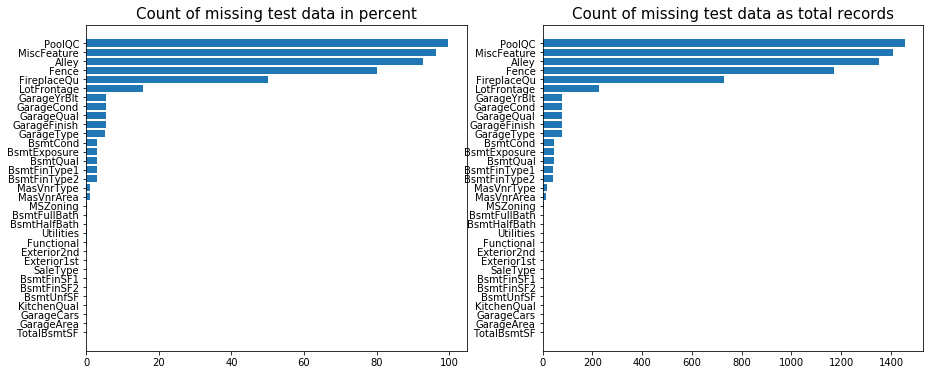

In [ ]:
#2) Test set
# Capture the necessary data

variables = test.columns

count = []

for variable in variables:
    length = test[variable].count()
    count.append(length)

count_pc = np.round(100 * pd.Series(count)/ len(test),2)
count = pd.Series(count)

missing = pd.DataFrame()
missing['variables'] = variables
missing['count'] = len(test) - count
missing['count_pc'] = 100 - count_pc
missing = missing[missing['count_pc'] > 0 ]
missing.sort_values(by = ['count_pc'], inplace=True)
missing_test = np.array(missing['variables'])


# Plot number of available data per variable
plt.subplots(figsize=(15,6))


# Plot missing data in percentage
plt.subplot(1,2,1)
plt.barh(missing['variables'],missing['count_pc'])
plt.title('Count of missing test data in percent', fontsize = 15)


# Plot total row number of missing data
plt.subplot(1,2,2)
plt.barh(missing['variables'],missing['count'])
plt.title('Count of missing test data as total records', fontsize = 15)

plt.show()

**Lot of missing data present in PoolQC, MiscFeature etc. Either the data is actually missing or not simply applicable. For example, if there is no pool, there cannot be pool quality.**

In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## 2.3) Data Cleaning - Dealing with missing data and incorrect data types

### 2.3.1) Change Data Type

**To Object**

In [ ]:
# Convert training data
train['MSSubClass'] = train['MSSubClass'].astype('object')
train['MoSold'] = train['MoSold'].astype('object')

# Convert training data
test['MSSubClass'] = test['MSSubClass'].astype('object')
test['MoSold'] = test['MoSold'].astype('object')

**To Numeric - For simplicity converting everything to float**

In [ ]:
# Converting training data
numeric_train = train.select_dtypes(include=[np.number]).columns.tolist()
train[numeric_train] = train[numeric_train].astype('float64')

# Converting test data
numeric_test = test.select_dtypes(include=[np.number]).columns.tolist()
train[numeric_test] = train[numeric_test].astype('float64')

## 2.3.2) Imputing

**In this step, we will get list of variables which will be adjusted (whose NULL values will be overridden)**

In [ ]:
drop_object = ['Functional', 'SaleType', 'Exterior1st', 'Exterior2nd']
drop_numeric = ['GarageYrBlt']

train_object = train.columns[(train.dtypes == 'object') & (train.columns.isin(missing_train))]
test_object = test.columns[(test.dtypes == 'object') & (test.columns.isin(missing_test))].drop(drop_object)

train_numeric = train.columns[(train.dtypes != 'object') & (train.columns.isin(missing_train))]
test_numeric = test.columns[(test.dtypes != 'object') & (test.columns.isin(missing_test))].drop(drop_numeric)

**Get list of variables that can be imputed**

In [ ]:
train_object_impute = train[['Electrical','Utilities','MSZoning', 'KitchenQual','Exterior1st']].columns
test_object_impute = train[['Electrical','Utilities','MSZoning', 'KitchenQual','Exterior1st']].columns

**Impute Null Values - Non Numeric Data**

The above variables identified for imputing are categorically. Instead of replacing by 0, mean or median, missing values will be replaced by mode

In [ ]:
# Imputing training dataset
for variable in train_object_impute:
    train[variable] = train[variable].fillna(train[variable].mode()[0])

# Imputing test dataset
for variable in test_object_impute:
    test[variable] = test[variable].fillna(test[variable].mode()[0])

In [ ]:
for variable in train_object:
    train[variable] = train[variable].fillna('None')

train['Functional'] = train['Functional'].fillna('Typ')
train['SaleType'] = train['SaleType'].fillna('Oth')
train['Exterior1st'] = train['Exterior1st'].fillna('Other')
train['Exteriro2nd'] = train['Exterior2nd'].fillna('Other')

for variable in test_object:
    test[variable] = test[variable].fillna('None')

test['Functional'] = test['Functional'].fillna('Typ')
test['SaleType'] = test['SaleType'].fillna('Oth')
test['Exterior1st'] = test['Exterior1st'].fillna('Other')
test['Exteriro2nd'] = test['Exterior2nd'].fillna('Other')

**Impute Null Values - Numeric Data**

In [ ]:
for variable in train_numeric:
    train[variable] = train[variable].fillna(0)

for variable in test_numeric:
    test[variable] = test[variable].fillna(0)

# 3) EDA

**3.1.1 Analyze non-numeric data**

In [ ]:
# Get quantitative variables
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')

# Get qualitative variables
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

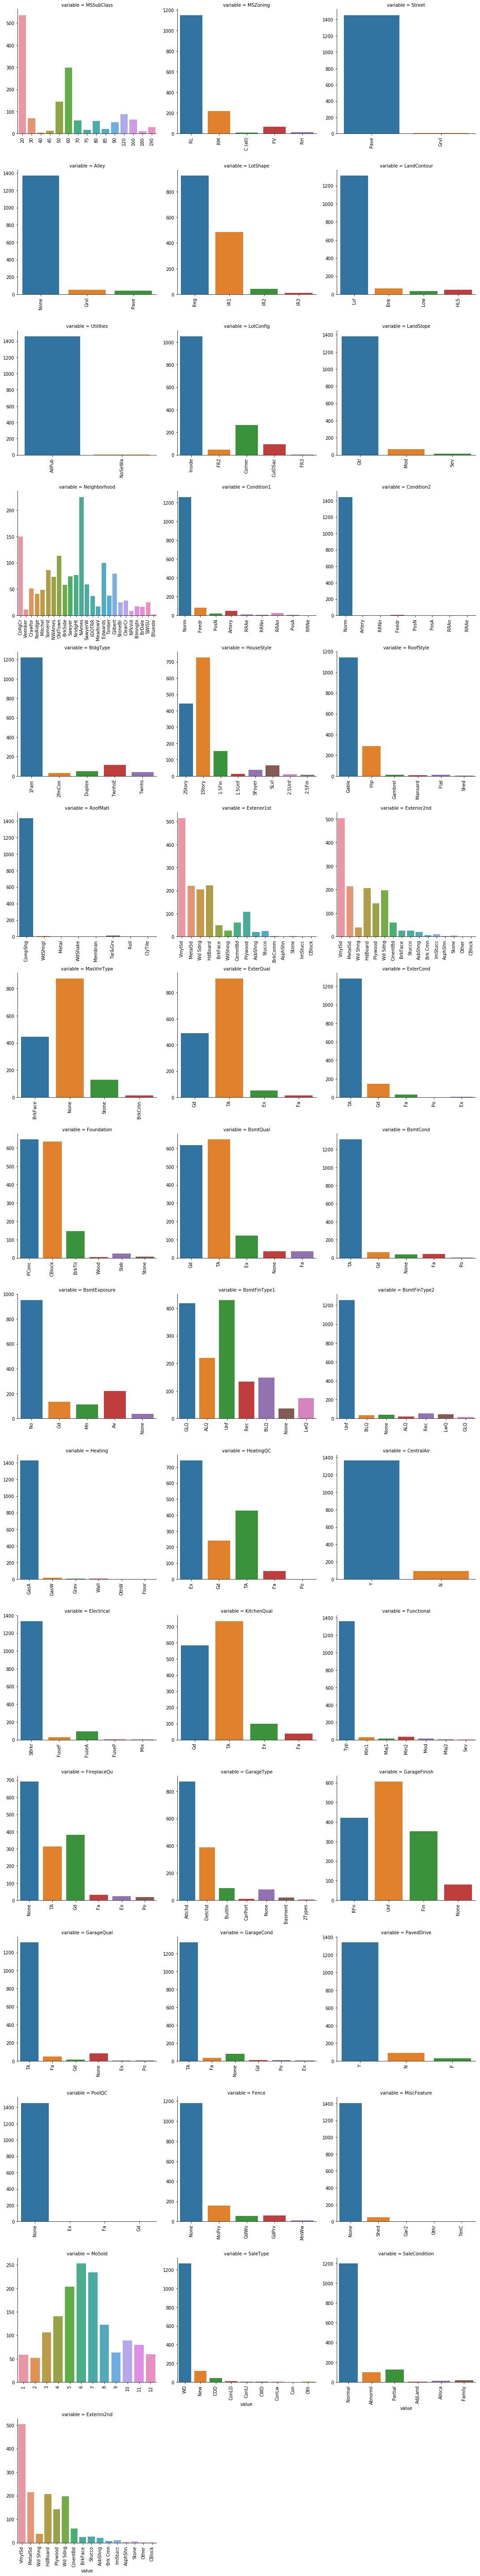

In [ ]:
def countplot(x, **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)

f = pd.melt(train, value_vars = qualitative)
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(countplot, "value")

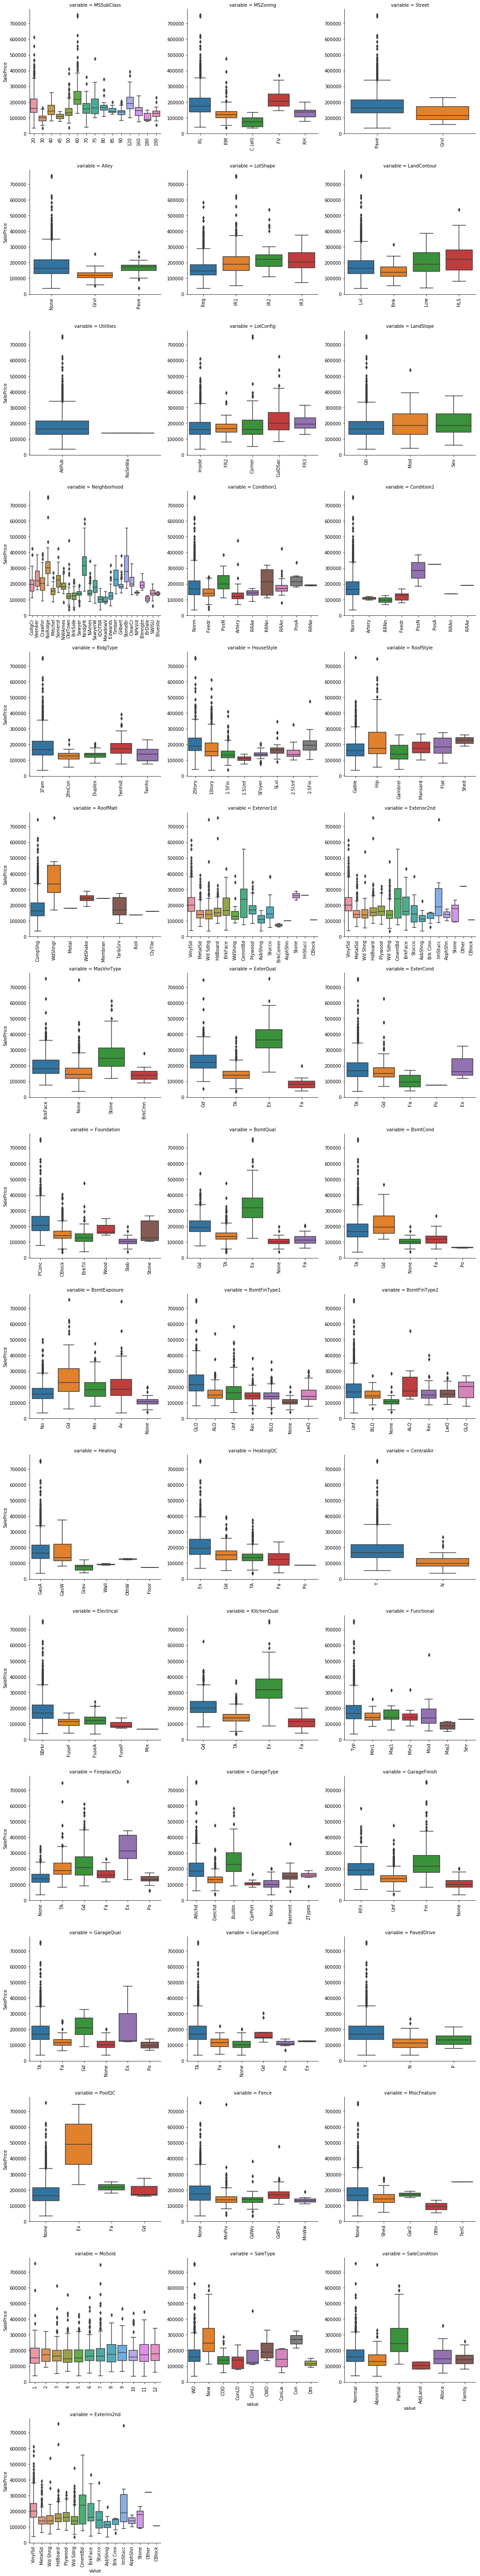

In [ ]:
def boxplot(x,y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(train, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col='variable',col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

**3.1.2 Analyze numeric data**

C:\Users\pchavan003\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\pchavan003\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\pchavan003\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\pchavan003\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("T

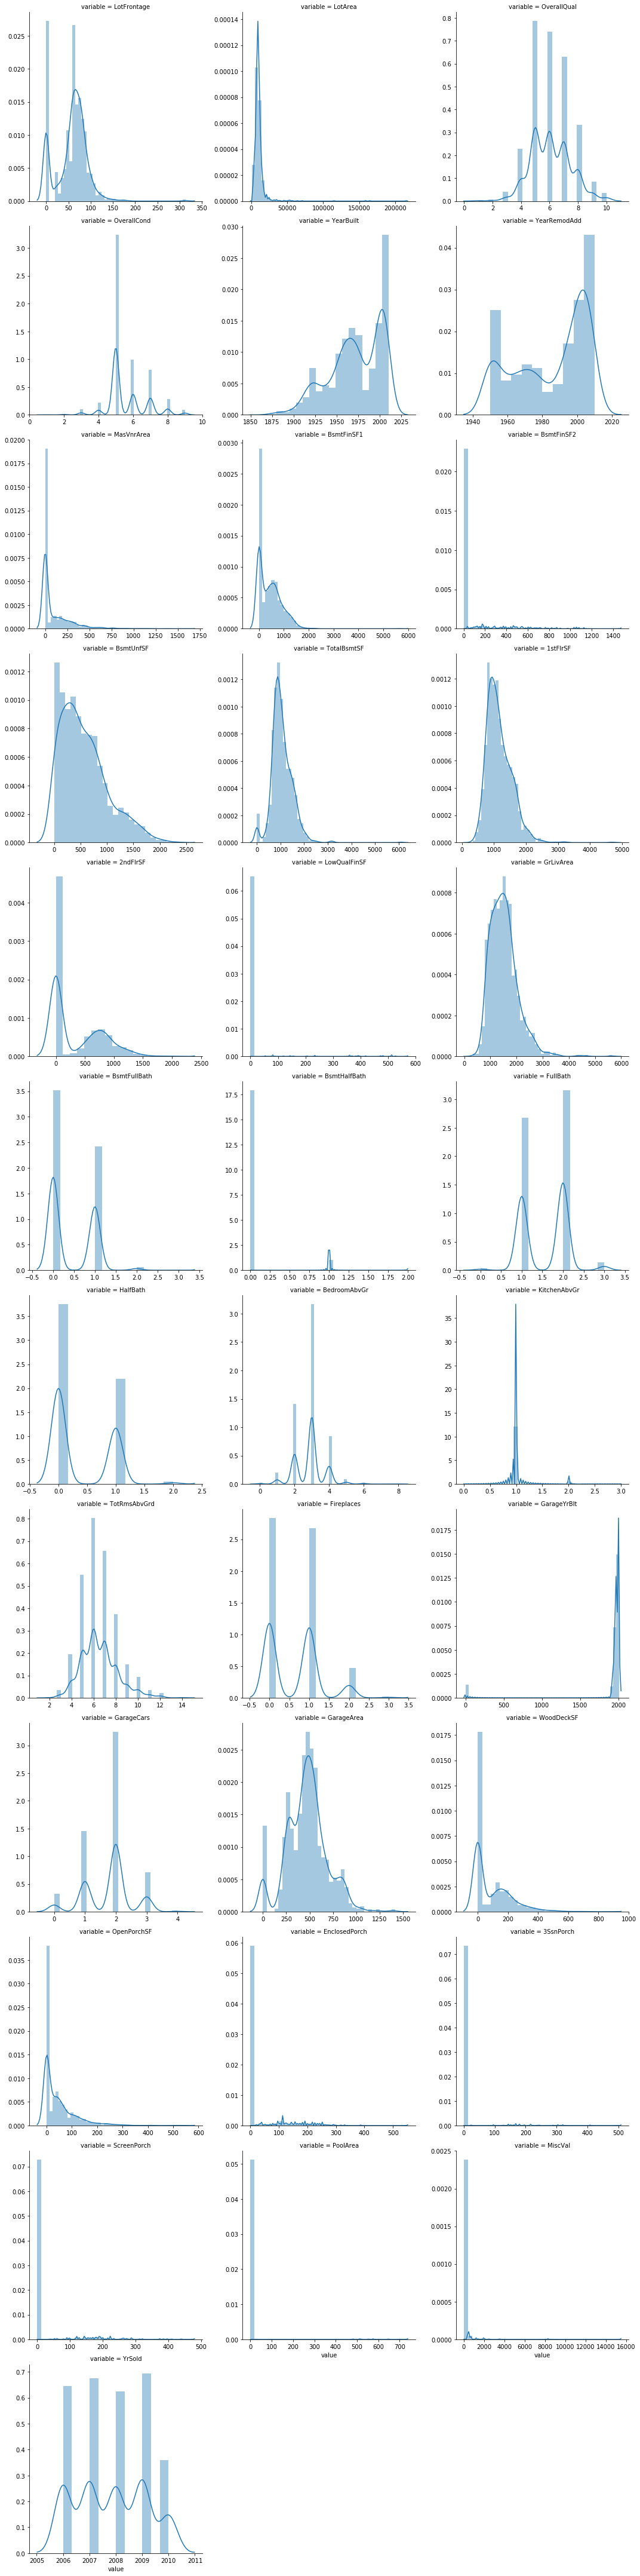

In [ ]:
f = pd.melt(train, value_vars=quantitative)
g = sns.FacetGrid (f, col='variable', col_wrap=3, sharex = False, sharey = False, size =5)
g = g.map(sns.distplot, "value")

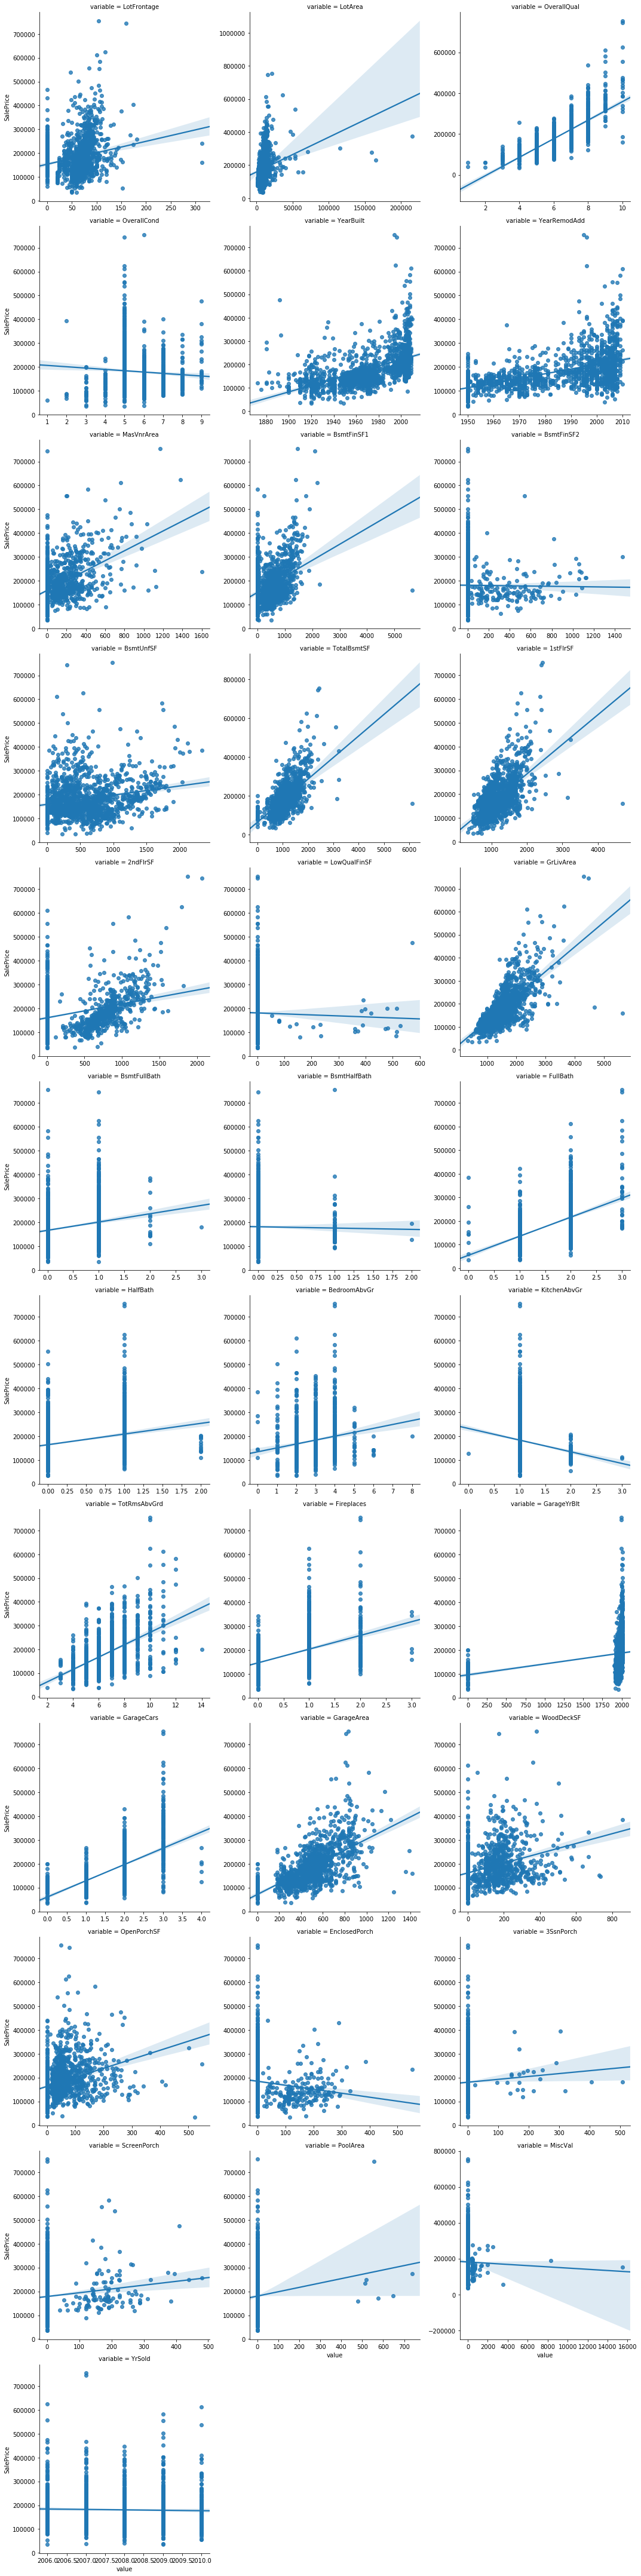

In [ ]:
f = pd.melt(train, id_vars = ['SalePrice'], value_vars = quantitative)
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(sns.regplot, "value", "SalePrice")

**3.1.3 Analyze/Visualize target variable: SalePrice**

C:\Users\pchavan003\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


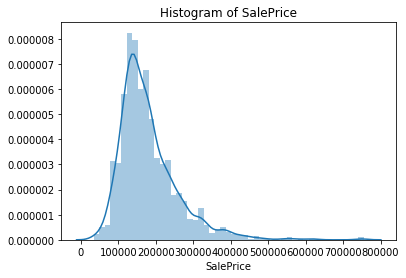

In [ ]:
sns.distplot(train['SalePrice'])
plt.title('Histogram of SalePrice')
plt.show()

**3.1.4 Correlation Matrix**

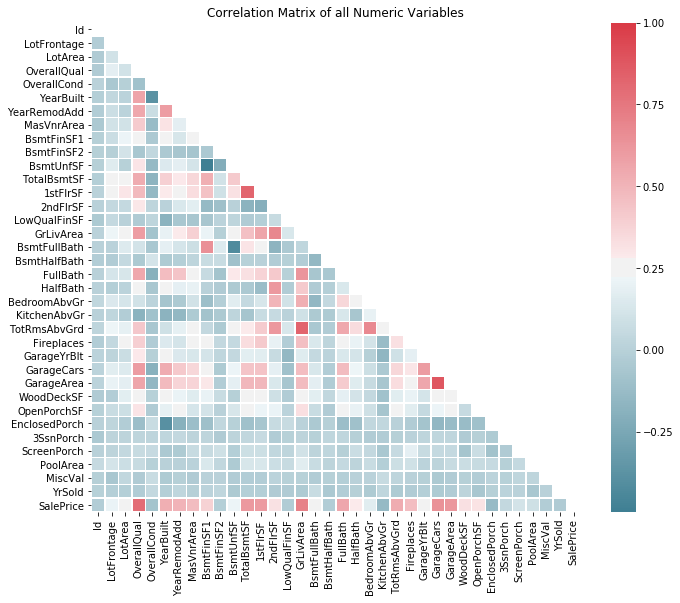

In [ ]:
# Correlation Matrix
d = train
corr = d.corr()

# Generate mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib fig
f, ax = plt.subplots(figsize=(11,9))

# Generate a custon diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, square=True, linewidths=.5, annot=False, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numeric Variables')
plt.show()

In [ ]:
corr.loc['SalePrice'][0:].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
LotFrontage      0.209624
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
GarageYrBlt      0.261366
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.472614
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

# 4) Preparating Data for Modeling

## 4.1) Decide which features to include in the models

In [ ]:
# Getting all features from training set apart from ID and SalePrice

predictor_cols = train.columns.drop(['Id','SalePrice'])
predictor_cols

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### 4.1.1) Delete Outliers

In [ ]:
#train = train[train['LotFrontage'] < 300]
train = train[train['LotArea'] < 100000]
train = train[train['BsmtFinSF1']< 5000]
train = train[train['TotalBsmtSF'] < 6000]
train = train[train['1stFlrSF'] < 4000]
train = train[train['GrLivArea'] < 4500]

### 4.1.2) Overwrite Bad Data

In [ ]:
test[test['GarageYrBlt'] == 2207]['GarageYrBlt'] = 2007

C:\Users\pchavan003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## 4.2) Change Categorical Features to Ordinal Features

In [ ]:
# Get a dictionary that can be used to map the orginal values to the quality values

dict_num = {
            'None':1, 'NA':1, 'Po': 2, 'Fa':3, 'TA':4, 'Gd': 5, 'Ex':6,
            'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ': 7,
            'Unf':2, 'RFn':3, 'Fin':4,
            'Sal':2, 'Sev':3, 'Maj2':4, 'Maj1':5, 'Mod': 6, 'Min2': 7, 'Min1':8, 'Typ': 9,
            'MnWw':2, 'GdWo': 3, 'MnPrv':4, 'GdPrv': 5,
            'Sev':1, 'Mod': 2, 'Gtl':3,
            'No':1, 'Mn':2, 'Av':3, 'Gd':4
}

In [ ]:
quality_variable = ['ExterQual',
                  'ExterCond',
                  'BsmtQual',
                  'BsmtCond',
                  'BsmtExposure',
                  'BsmtFinType1',
                  'BsmtFinType2',
                  'HeatingQC',
                  'KitchenQual',
                  'Functional',
                  'FireplaceQu',
                  'GarageFinish',
                  'GarageQual',
                  'GarageCond',
                  'PoolQC',
                  'Fence',
                  'LandSlope']

In [ ]:
for variable in quality_variable:
    train[variable] = train[variable].map(dict_num).astype('int')
    test[variable] = test[variable].map(dict_num).astype('int')

In [ ]:
train['LandSlope']

0       3
1       3
2       3
3       3
4       3
5       3
6       3
7       3
8       3
9       3
10      3
11      3
12      3
13      3
14      3
15      3
16      3
17      3
18      3
19      3
20      3
21      3
22      3
23      3
24      3
25      3
26      3
27      3
28      3
29      3
       ..
1430    3
1431    3
1432    3
1433    3
1434    2
1435    3
1436    3
1437    3
1438    3
1439    3
1440    2
1441    3
1442    3
1443    3
1444    3
1445    3
1446    3
1447    3
1448    3
1449    3
1450    3
1451    3
1452    3
1453    3
1454    3
1455    3
1456    3
1457    3
1458    3
1459    3
Name: LandSlope, Length: 1453, dtype: int32